## Create few lines of Bad Bunny Lyrics with NLP

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
%cd '/content/drive/MyDrive/Tensorflow/NLP'

/content/drive/MyDrive/Tensorflow/NLP


In [ ]:
%ls

 aclImdb_v1.tar.gz                    'Sentiment In Text.ipynb'
 imdb_model.h5                        'Sequence Models and Literature.ipynb'
'Lessons on Sentiment in Text.ipynb'   todas_canciones_bad_bunny.txt
'Lesson word embeddings.ipynb'         vecs_imdb.tsv
 meta_imdb.tsv                         vecs.tsv
 meta.tsv                             'Word Embeddings.ipynb'


In [ ]:
data = open('/content/drive/MyDrive/Tensorflow/NLP/todas_canciones_bad_bunny.txt').read()

In [ ]:
#print(data)

In [ ]:
corpus = data.lower().split('\n')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words)

{'que': 1, 'no': 2, 'me': 3, 'y': 4, 'la': 5, 'yo': 6, 'a': 7, 'de': 8, 'te': 9, 'el': 10, 'en': 11, 'lo': 12, 'tú': 13, 'se': 14, 'ey': 15, 'si': 16, 'es': 17, 'un': 18, 'con': 19, 'pero': 20, "pa'": 21, 'los': 22, 'eh': 23, 'yeh': 24, 'por': 25, 'mi': 26, 'ya': 27, 'como': 28, 'baby': 29, 'tu': 30, 'le': 31, 'las': 32, 'soy': 33, 'ti': 34, 'mí': 35, 'quiero': 36, 'una': 37, 'sé': 38, 'cuando': 39, 'bien': 40, 'voy': 41, 'tengo': 42, 'ahora': 43, 'ella': 44, 'yeah': 45, 'está': 46, 'qué': 47, 'siempre': 48, "to'": 49, 'otra': 50, 'bunny': 51, 'bad': 52, 'dime': 53, 'más': 54, 'eso': 55, 'sin': 56, 'estoy': 57, 'va': 58, 'hoy': 59, 'ni': 60, 'porque': 61, 'al': 62, 'oh': 63, 'cabrón': 64, 'hasta': 65, 'mami': 66, 'pa’': 67, 'hay': 68, 'noche': 69, 'na': 70, 'del': 71, 'eres': 72, 'nunca': 73, 'quiere': 74, 'todo': 75, 'vez': 76, 'nos': 77, 'conmigo': 78, 'nadie': 79, 'bebé': 80, 'solo': 81, 'ese': 82, 'son': 83, 'mejor': 84, 'ser': 85, 'hago': 86, 'vida': 87, 'mía': 88, 'aquí': 89, 'as

In [ ]:
##TURN THE DATA INTO ARRAYS 
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# PAD SEQUENCES
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen= max_sequence_len,padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index)

{'que': 1, 'no': 2, 'me': 3, 'y': 4, 'la': 5, 'yo': 6, 'a': 7, 'de': 8, 'te': 9, 'el': 10, 'en': 11, 'lo': 12, 'tú': 13, 'se': 14, 'ey': 15, 'si': 16, 'es': 17, 'un': 18, 'con': 19, 'pero': 20, "pa'": 21, 'los': 22, 'eh': 23, 'yeh': 24, 'por': 25, 'mi': 26, 'ya': 27, 'como': 28, 'baby': 29, 'tu': 30, 'le': 31, 'las': 32, 'soy': 33, 'ti': 34, 'mí': 35, 'quiero': 36, 'una': 37, 'sé': 38, 'cuando': 39, 'bien': 40, 'voy': 41, 'tengo': 42, 'ahora': 43, 'ella': 44, 'yeah': 45, 'está': 46, 'qué': 47, 'siempre': 48, "to'": 49, 'otra': 50, 'bunny': 51, 'bad': 52, 'dime': 53, 'más': 54, 'eso': 55, 'sin': 56, 'estoy': 57, 'va': 58, 'hoy': 59, 'ni': 60, 'porque': 61, 'al': 62, 'oh': 63, 'cabrón': 64, 'hasta': 65, 'mami': 66, 'pa’': 67, 'hay': 68, 'noche': 69, 'na': 70, 'del': 71, 'eres': 72, 'nunca': 73, 'quiere': 74, 'todo': 75, 'vez': 76, 'nos': 77, 'conmigo': 78, 'nadie': 79, 'bebé': 80, 'solo': 81, 'ese': 82, 'son': 83, 'mejor': 84, 'ser': 85, 'hago': 86, 'vida': 87, 'mía': 88, 'aquí': 89, 'as

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1635/1635 [==============================] - 17s 9ms/step - loss: 6.0553 - accuracy: 0.1282
Epoch 2/100
1635/1635 [==============================] - 14s 9ms/step - loss: 4.8735 - accuracy: 0.2296
Epoch 3/100
1635/1635 [==============================] - 14s 9ms/step - loss: 3.8014 - accuracy: 0.3006
Epoch 4/100
1635/1635 [==============================] - 14s 9ms/step - loss: 3.1567 - accuracy: 0.3602
Epoch 5/100
1635/1635 [==============================] - 14s 9ms/step - loss: 2.7987 - accuracy: 0.4026
Epoch 6/100
1635/1635 [==============================] - 14s 9ms/step - loss: 2.5441 - accuracy: 0.4409
Epoch 7/100
1635/1635 [==============================] - 14s 9ms/step - loss: 2.3743 - accuracy: 0.4647
Epoch 8/100
1635/1635 [==============================] - 14s 9ms/step - loss: 2.3032 - accuracy: 0.4790
Epoch 9/100
1635/1635 [==============================] - 14s 9ms/step - loss: 2.2345 - accuracy: 0.4881
Epoch 10/100
1635/1635 [==============================] - 14s 9m

In [ ]:
import joblib
model.save('./canciones_bad_bunny_prediction.h5')
# save Tokenizer
joblib.dump(tokenizer,'./bad_bunny_tokenizer.pkl')

# save Max sequence length
joblib.dump (max_sequence_len,'./max_sequence_length.pkl')

['./max_sequence_length.pkl']

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

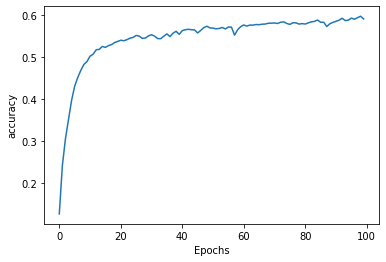

In [ ]:
plot_graphs(history, 'accuracy')

## API Creation for production

In [ ]:
print(model)

In [ ]:
seed_text = "mi amor vamos"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

mi amor vamos pa su yerno los cosos pa’lla les caigo a la joda ey ey ey ey bulbasaur ozuna al gym fenty


In [ ]:
count = 0
text = ""
for i in seed_text.split(" "):
  if count == 0:
    text = text + "".join(i)
  else:
    if count % 7 == 0:
      text = text + "\n"
    text = text + " " + "".join(i)
 
  
  
  count = count +1
print(text)

mi amor vamos pa su yerno los
 cosos pa’lla les caigo a la joda
 ey ey ey ey bulbasaur ozuna al
 gym fenty


In [ ]:
new_model = tf.keras.models.load_model('./canciones_bad_bunny_prediction.h5')

In [ ]:
seed_text = "mi amor vamos"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(new_model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

mi amor vamos pa su yerno los cosos pa’lla les caigo a la joda ey ey ey ey bulbasaur ozuna al gym fenty


In [ ]:
with open('bad_bunny_tokenizer.pickle', 'rb') as bb:
  new_tokenizer = pickle.load(bb)

## Create a Function for loading the model

In [ ]:
## load model & other stuff
### load tokenizer
bad_bunny_tokenizer = joblib.load('./bad_bunny_tokenizer.pkl')
print(bad_bunny_tokenizer)


### load max_seq_len
bad_buny_max_seq_len = joblib.load('max_sequence_length.pkl')


### Load the model
bad_bunny_model = tf.keras.models.load_model('canciones_bad_bunny_prediction.h5')
#------------------------------------




seed_text = "Baby, ya yo me enteré, se nota cuando me ve Ahí donde no has llegao' sabes que yo te llevaré Y dime qué quieres beber, es que tú eres mi bebé ¿Y de nosotros quién va a hablar? Si no nos dejamos ver"
next_words = 40
  
for _ in range(next_words):
	token_list = bad_bunny_tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=bad_buny_max_seq_len-1, padding='pre')
	predicted = np.argmax(bad_bunny_model.predict(token_list, verbose=0),axis=1)
	output_word = ""
	for word, index in bad_bunny_tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word


count = 0
text = ""
for i in seed_text.split(" "):
  if count == 0:
    text = text + "".join(i)
  else:
    if count % 7 == 0:
      text = text + "\n"
    text = text + " " + "".join(i)
 
  
  
  count = count +1
text

"Baby, ya yo me enteré, se nota\n cuando me ve Ahí donde no has\n llegao' sabes que yo te llevaré Y\n dime qué quieres beber, es que tú\n eres mi bebé ¿Y de nosotros quién\n va a hablar? Si no nos dejamos\n ver mires completita estatua flakes mano tatuao'\n tiro dados o con 3 mamis que\n devuélvase ferre' carolina igual ¡fium ¡fium ¡fium\n seductoria barkley fvck the esquimal wazowski na'\n rosal tresciento' é austin baby real ahorita\n desde siempre 3 nalgas si dando"